In [1]:
import lumicks.pylake as lk

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
#DNA1 Condition 1 (Limiting Rad51-GFP on 11-12-2024)

In [120]:
file = lk.File("20241112-142250 Kymograph C1_DNA1_Kymo.h5")

In [121]:
print(file)

File root metadata:
- Bluelake version: 2.5.3
- Description: 
- Experiment: 
- Export time (ns): 1731451851530289000
- File format version: 2
- GUID: {176EC325-207C-49A5-A9AD-056756E01D70}

Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4541
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4541
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4541
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4541
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 7
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4541
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 23645001
  F

In [122]:
print(file.kymos)

{'C1_DNA1_Kymo': Kymo(pixels=75)}


In [123]:
for name, kymo in file.kymos.items():
    print(f"kymograph '{name}', starts at {kymo.start} ns")

kymograph 'C1_DNA1_Kymo', starts at 1731442970410301800 ns


In [124]:
rgb = kymo.get_image("rgb")

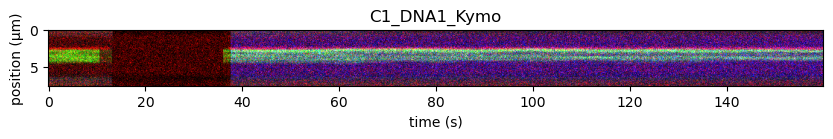

In [125]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("rgb", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

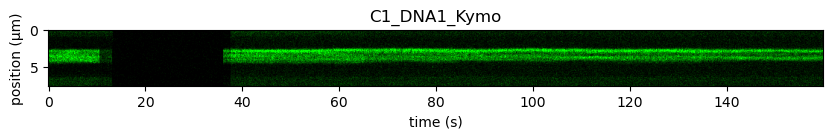

In [126]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("g", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

In [127]:
#Trying background correction

In [128]:
background = kymo["40s":"60s"].crop_by_distance(5.0, 5.1)
green_background_per_pixel = np.sum(background.get_image("green"))

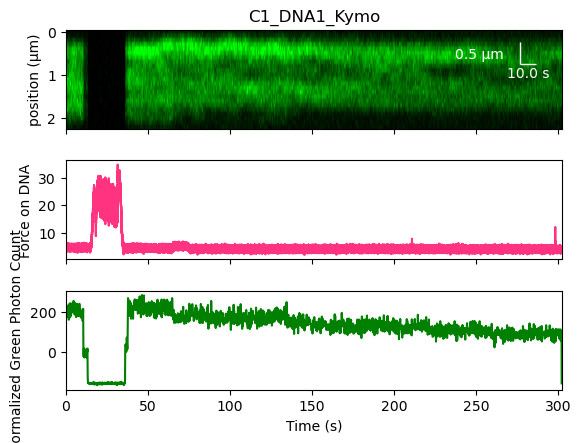

In [129]:
# Calculate background-subtracted photon count
background_subtracted_photon_count = file["Photon count"]["Green"].downsampled_over(kymo.line_timestamp_ranges(), reduce=np.sum) - green_background_per_pixel

# Plot the background-subtracted photon count
kymo.crop_by_distance(2.4, 4.6).plot_with_channels(
    [
        file.force2x.downsampled_by(100),
        background_subtracted_photon_count,
    ],
    "g",
    adjustment=lk.ColorAdjustment(0, 98, "percentile"),
    aspect_ratio=0.2,
    title_vertical=True,
    scale_bar=lk.ScaleBar(10.0, 0.5),
    colors=[[1.0, 0.2, 0.5], "green"],
    labels=["Force on DNA", "Normalized Green Photon Count"],
)
time_counts =background_subtracted_photon_count.timestamps
time_counts = (time_counts - time_counts[0]) *1e-9
photon_counts=background_subtracted_photon_count.data
counts= np.vstack((time_counts,photon_counts)).T
np.savetxt('C1_DNA1_Green_counts.csv',counts, delimiter=',', header='time counts')
#plt.savefig('DNA1_Condition1_GreenCount.png')

In [131]:
#Condition 1 DNA2

In [132]:
file = lk.File("20241112-143226 Kymograph C1_DNA2_Kymo.h5")

In [133]:
print(file)

File root metadata:
- Bluelake version: 2.5.3
- Description: 
- Experiment: 
- Export time (ns): 1731451851562289000
- File format version: 2
- GUID: {F9E991A9-5EF7-4CEE-919E-3B59A761F855}

Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 6309
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 6309
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 6309
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 6309
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 6309
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 32855001
  F

In [134]:
print(file.kymos)

{'C1_DNA2_Kymo': Kymo(pixels=75)}


In [135]:
for name, kymo in file.kymos.items():
    print(f"kymograph '{name}', starts at {kymo.start} ns")

kymograph 'C1_DNA2_Kymo', starts at 1731443546954301800 ns


In [136]:
rgb = kymo.get_image("rgb")

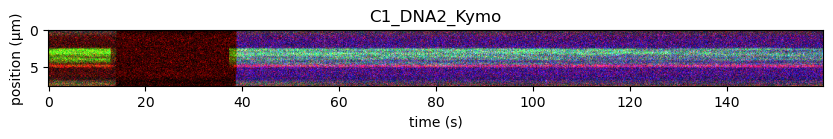

In [137]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("rgb", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

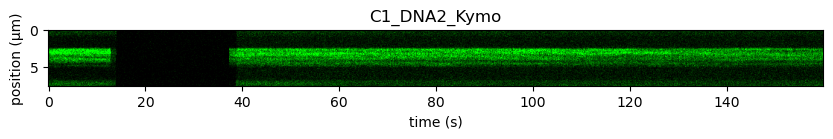

In [138]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("g", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

In [139]:
background = kymo["50s":"60s"].crop_by_distance(1.2, 1.3)
green_background_per_pixel = np.sum(background.get_image("green"))

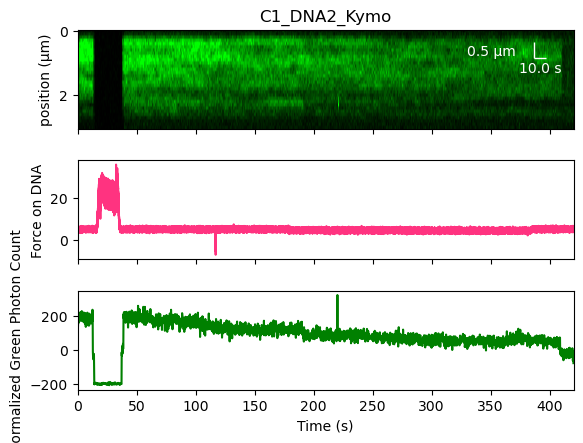

In [140]:
# Calculate background-subtracted photon count
background_subtracted_photon_count = file["Photon count"]["Green"].downsampled_over(kymo.line_timestamp_ranges(), reduce=np.sum) - green_background_per_pixel

# Plot the background-subtracted photon count
kymo.crop_by_distance(2.2, 5.3).plot_with_channels(
    [
        file.force2x.downsampled_by(100),
        background_subtracted_photon_count,
    ],
    "g",
    adjustment=lk.ColorAdjustment(0, 98, "percentile"),
    aspect_ratio=0.2,
    title_vertical=True,
    scale_bar=lk.ScaleBar(10.0, 0.5),
    colors=[[1.0, 0.2, 0.5], "green"],
    labels=["Force on DNA", "Normalized Green Photon Count"],
)
time_counts =background_subtracted_photon_count.timestamps
time_counts = (time_counts - time_counts[0]) *1e-9
photon_counts=background_subtracted_photon_count.data
counts= np.vstack((time_counts,photon_counts)).T
np.savetxt('C1_DNA2_Green_counts.csv',counts, delimiter=',', header='time counts')
#plt.savefig('DNA2_Condition1_GreenCount.png')

In [141]:
#DNA3 Condition 1

In [142]:
file = lk.File("20241112-144509 Kymograph C1_DNA3_Kymo.h5")

In [143]:
print(file)

File root metadata:
- Bluelake version: 2.5.3
- Description: 
- Experiment: 
- Export time (ns): 1731451851594289000
- File format version: 2
- GUID: {65F9EEA6-6369-44FD-B3C1-6C335FD6BF48}

Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5122
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5122
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5122
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5122
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 7
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5122
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 26670001
  F

In [144]:
print(file.kymos)

{'C1_DNA3_Kymo': Kymo(pixels=71)}


In [145]:
for name, kymo in file.kymos.items():
    print(f"kymograph '{name}', starts at {kymo.start} ns")

kymograph 'C1_DNA3_Kymo', starts at 1731444309610301800 ns


In [146]:
rgb = kymo.get_image("rgb")

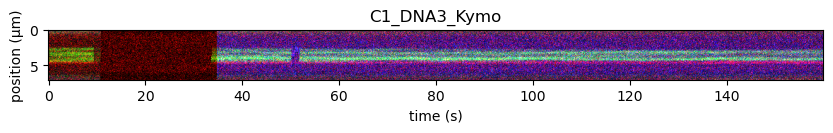

In [147]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("rgb", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

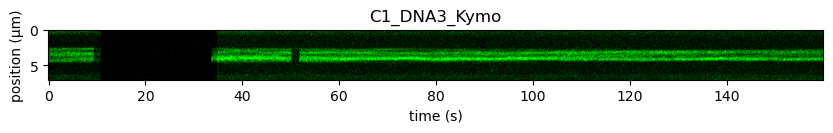

In [148]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("g", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

In [149]:
background = kymo["80s":"85s"].crop_by_distance(5.3, 5.4)
green_background_per_pixel = np.sum(background.get_image("green"))

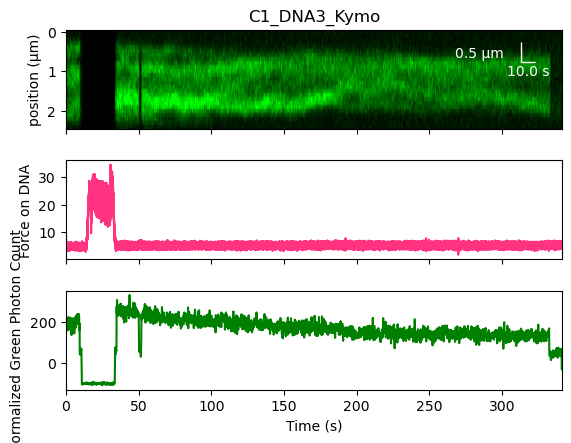

In [150]:
# Calculate background-subtracted photon count
background_subtracted_photon_count = file["Photon count"]["Green"].downsampled_over(kymo.line_timestamp_ranges(), reduce=np.sum) - green_background_per_pixel

# Plot the background-subtracted photon count
kymo.crop_by_distance(2.4, 4.8).plot_with_channels(
    [
        file.force2x.downsampled_by(100),
        background_subtracted_photon_count,
    ],
    "g",
    adjustment=lk.ColorAdjustment(0, 98, "percentile"),
    aspect_ratio=0.2,
    title_vertical=True,
    scale_bar=lk.ScaleBar(10.0, 0.5),
    colors=[[1.0, 0.2, 0.5], "green"],
    labels=["Force on DNA", "Normalized Green Photon Count"],
)
time_counts =background_subtracted_photon_count.timestamps
time_counts = (time_counts - time_counts[0]) *1e-9
photon_counts=background_subtracted_photon_count.data
counts= np.vstack((time_counts,photon_counts)).T
np.savetxt('C1_DNA3_Green_counts.csv',counts, delimiter=',', header='time counts')
#plt.savefig('DNA3_Condition1_GreenCount.png')

In [151]:
####DNA4 Condition 1

In [152]:
file = lk.File("20241112-145602 Kymograph C1_DNA4_Kymo.h5")

In [153]:
print(file)

File root metadata:
- Bluelake version: 2.5.3
- Description: 
- Experiment: 
- Export time (ns): 1731451851626289000
- File format version: 2
- GUID: {783CD2D2-C1B9-4454-9E4D-E98C6AD3DBE4}

Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 8510
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 8510
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 8510
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 8510
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 8510
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 44317501
  F

In [154]:
print(file.kymos)

{'C1_DNA4_Kymo': Kymo(pixels=72)}


In [155]:
for name, kymo in file.kymos.items():
    print(f"kymograph '{name}', starts at {kymo.start} ns")

kymograph 'C1_DNA4_Kymo', starts at 1731444962666301800 ns


In [156]:
rgb = kymo.get_image("rgb")

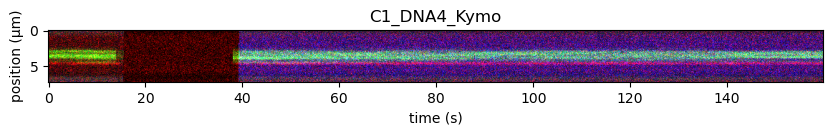

In [157]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("rgb", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

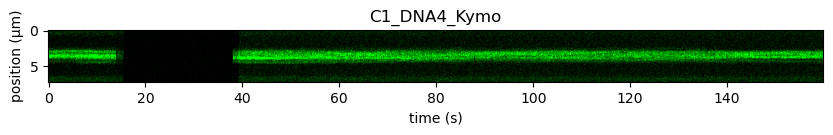

In [158]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("g", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

In [159]:
background = kymo["50s":"55s"].crop_by_distance(1.2, 1.4)
green_background_per_pixel = np.sum(background.get_image("green"))

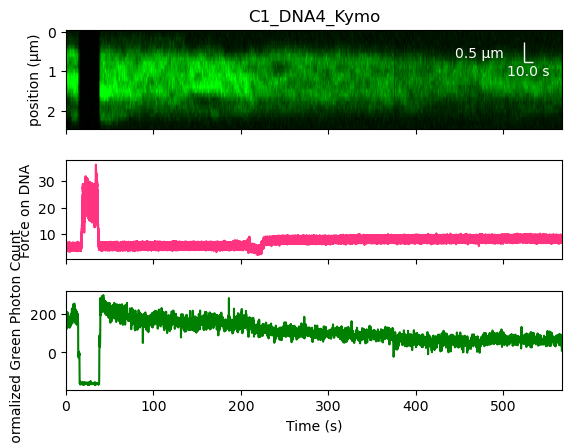

In [160]:
background_subtracted_photon_count = file["Photon count"]["Green"].downsampled_over(kymo.line_timestamp_ranges(), reduce=np.sum) - green_background_per_pixel

# Plot the background-subtracted photon count
kymo.crop_by_distance(2.4, 4.8).plot_with_channels(
    [
        file.force2x.downsampled_by(100),
        background_subtracted_photon_count,
    ],
    "g",
    adjustment=lk.ColorAdjustment(0, 98, "percentile"),
    aspect_ratio=0.2,
    title_vertical=True,
    scale_bar=lk.ScaleBar(10.0, 0.5),
    colors=[[1.0, 0.2, 0.5], "green"],
    labels=["Force on DNA", "Normalized Green Photon Count"],
)
time_counts =background_subtracted_photon_count.timestamps
time_counts = (time_counts - time_counts[0]) *1e-9
photon_counts=background_subtracted_photon_count.data
counts= np.vstack((time_counts,photon_counts)).T
np.savetxt('C1_DNA4_Green_counts.csv',counts, delimiter=',', header='time counts')
plt.savefig('DNA4_Condition1_GreenCount.png')

In [161]:
####DNA5 Condition 1

In [162]:
file = lk.File("20241112-151139 Kymograph C1_DNA5_Kymo.h5")

In [163]:
print(file)

File root metadata:
- Bluelake version: 2.5.3
- Description: 
- Experiment: 
- Export time (ns): 1731451851658289000
- File format version: 2
- GUID: {80FF354B-BE84-4171-B22A-50E952E679C5}

Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4093
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4093
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4093
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4093
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 6
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 4093
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 21310001
  F

In [164]:
print(file.kymos)

{'C1_DNA5_Kymo': Kymo(pixels=75)}


In [165]:
for name, kymo in file.kymos.items():
    print(f"kymograph '{name}', starts at {kymo.start} ns")

kymograph 'C1_DNA5_Kymo', starts at 1731445899402301800 ns


In [166]:
rgb = kymo.get_image("rgb")

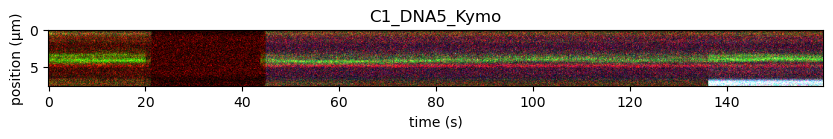

In [167]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("rgb", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

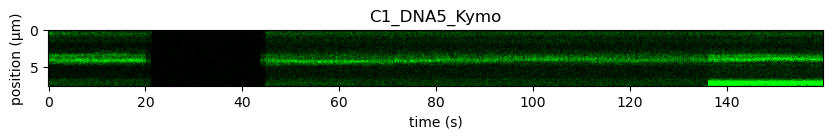

In [168]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("g", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

In [169]:
background = kymo["60s":"70s"].crop_by_distance(5.2, 5.3)
green_background_per_pixel = np.sum(background.get_image("green"))

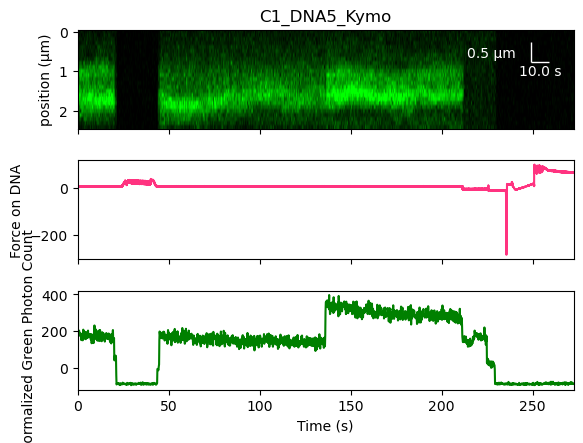

In [170]:
background_subtracted_photon_count = file["Photon count"]["Green"].downsampled_over(kymo.line_timestamp_ranges(), reduce=np.sum) - green_background_per_pixel

# Plot the background-subtracted photon count
kymo.crop_by_distance(2.4, 4.8).plot_with_channels(
    [
        file.force2x.downsampled_by(100),
        background_subtracted_photon_count,
    ],
    "g",
    adjustment=lk.ColorAdjustment(0, 98, "percentile"),
    aspect_ratio=0.2,
    title_vertical=True,
    scale_bar=lk.ScaleBar(10.0, 0.5),
    colors=[[1.0, 0.2, 0.5], "green"],
    labels=["Force on DNA", "Normalized Green Photon Count"],
)
time_counts =background_subtracted_photon_count.timestamps
time_counts = (time_counts - time_counts[0]) *1e-9
photon_counts=background_subtracted_photon_count.data
counts= np.vstack((time_counts,photon_counts)).T
np.savetxt('C1_DNA5_Green_counts.csv',counts, delimiter=',', header='time counts')
#plt.savefig('DNA5_Condition1_GreenCount.png')

In [171]:
#####DN6 Condition 1

In [172]:
file = lk.File("20241112-152153 Kymograph C1_DNA6_Kymo.h5")

In [173]:
print(file)

File root metadata:
- Bluelake version: 2.5.3
- Description: 
- Experiment: 
- Export time (ns): 1731451851690289000
- File format version: 2
- GUID: {F3E88E0A-004A-4A88-B737-363A10927BB9}

Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 6150
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 6150
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 6150
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 6150
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 3
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 6150
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 32022501
  F

In [174]:
print(file.kymos)

{'C1_DNA6_Kymo': Kymo(pixels=72)}


In [175]:
for name, kymo in file.kymos.items():
    print(f"kymograph '{name}', starts at {kymo.start} ns")

kymograph 'C1_DNA6_Kymo', starts at 1731446513866301800 ns


In [176]:
rgb = kymo.get_image("rgb")

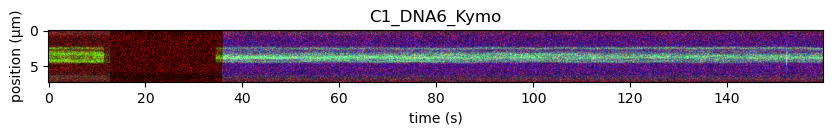

In [177]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("rgb", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

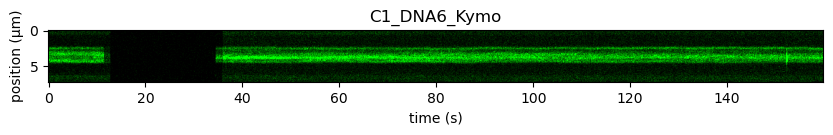

In [178]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
kymo_new = kymo["0s":"160s"].plot("g", adjustment=lk.ColorAdjustment(0, 99, mode="percentile"))
plt.show()

In [179]:
background = kymo["40s":"60s"].crop_by_distance(5.2, 5.3)
green_background_per_pixel = np.sum(background.get_image("green"))

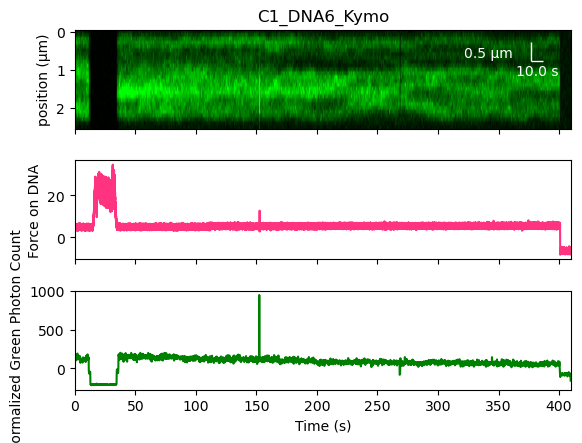

In [180]:
# Calculate background-subtracted photon count
background_subtracted_photon_count = file["Photon count"]["Green"].downsampled_over(kymo.line_timestamp_ranges(), reduce=np.sum) - green_background_per_pixel

# Plot the background-subtracted photon count
kymo.crop_by_distance(2.3, 4.8).plot_with_channels(
    [
        file.force2x.downsampled_by(100),
        background_subtracted_photon_count,
    ],
    "g",
    adjustment=lk.ColorAdjustment(0, 98, "percentile"),
    aspect_ratio=0.2,
    title_vertical=True,
    scale_bar=lk.ScaleBar(10.0, 0.5),
    colors=[[1.0, 0.2, 0.5], "green"],
    labels=["Force on DNA", "Normalized Green Photon Count"],
)
time_counts =background_subtracted_photon_count.timestamps
time_counts = (time_counts - time_counts[0]) *1e-9
photon_counts=background_subtracted_photon_count.data
counts= np.vstack((time_counts,photon_counts)).T
np.savetxt('C1_DNA6_Green_counts.csv',counts, delimiter=',', header='time counts')
#plt.savefig('DNA6_Condition1_GreenCount.png')

In [ ]:
###############